In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE

In [2]:
df_train = pd.read_csv('training_data.csv')
df_test = pd.read_csv('test_data (1).csv')

In [3]:
df_train.columns

Index(['url_id', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_s

In [4]:
df_train.shape

(28786, 61)

In [5]:
df_train.head()

,url_id,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,2,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,3,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,5,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
4,6,731,10,370,0.559889,1.0,0.698198,2,2,0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855


In [6]:
## feature selection 

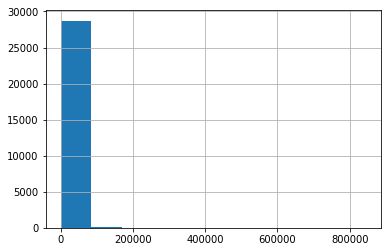

In [7]:
df_train[' shares'].hist() # outliers present

In [8]:
df_train = df_train[df_train[' shares'] <=3500] # Under Samplinmg: remove around 20% of outliers 

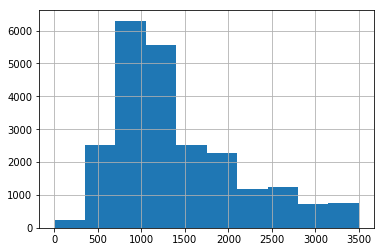

In [9]:
df_train[' shares'].hist() 

In [10]:
df_train.shape

(23296, 61)

url_id


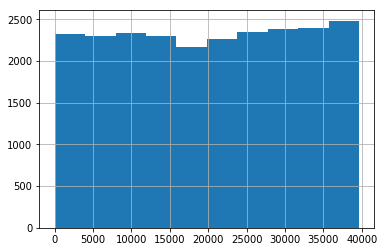

 timedelta


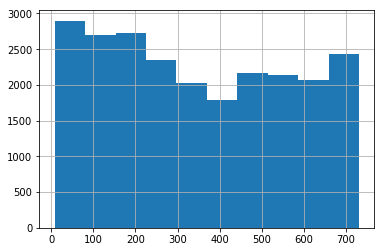

 n_tokens_title


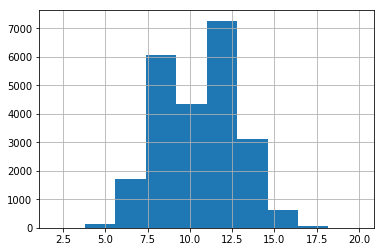

 n_tokens_content


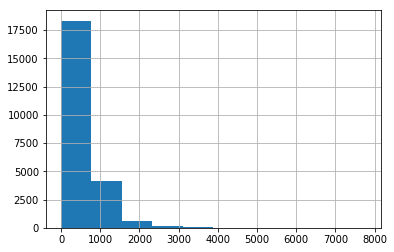

 n_unique_tokens


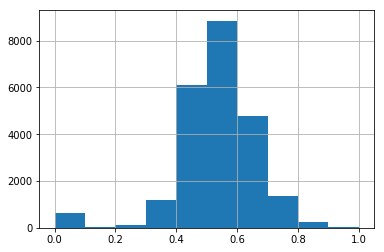

 n_non_stop_words


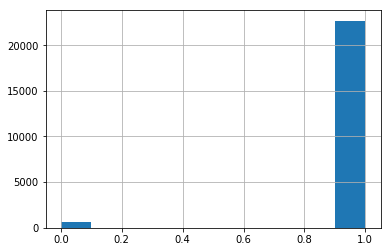

 n_non_stop_unique_tokens


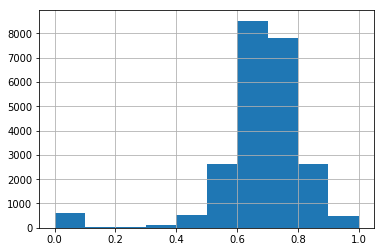

 num_hrefs


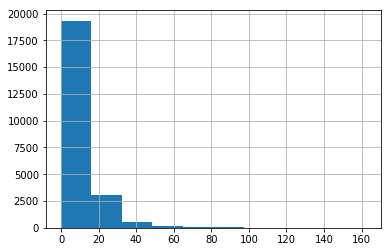

 num_self_hrefs


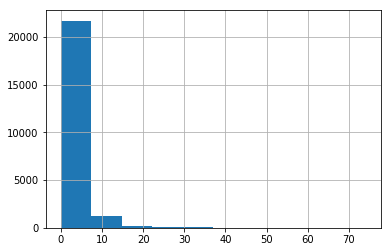

 num_imgs


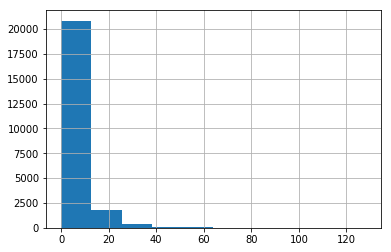

 num_videos


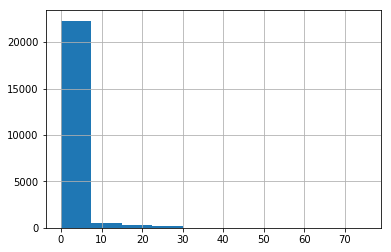

 average_token_length


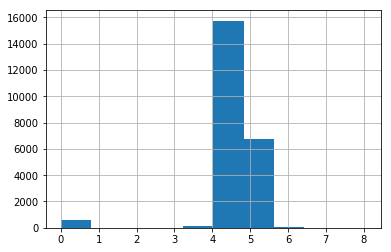

 num_keywords


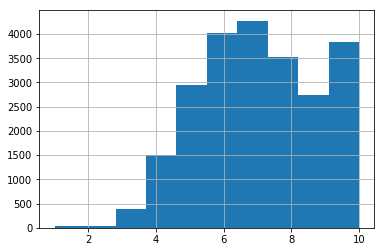

 data_channel_is_lifestyle


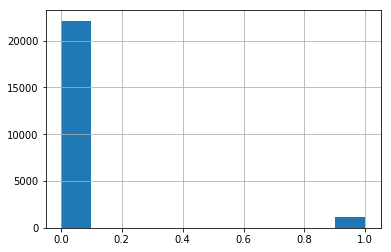

 data_channel_is_entertainment


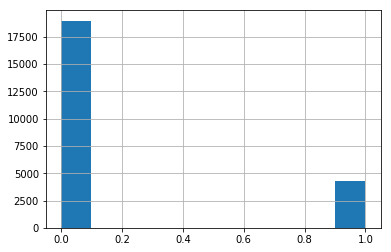

 data_channel_is_bus


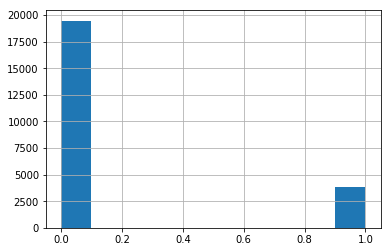

 data_channel_is_socmed


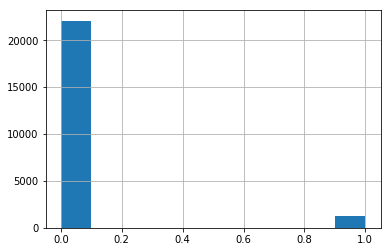

 data_channel_is_tech


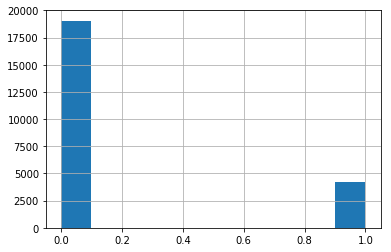

 data_channel_is_world


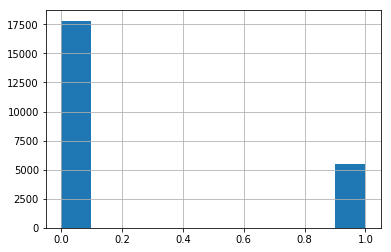

 kw_min_min


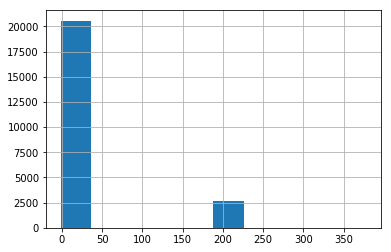

 kw_max_min


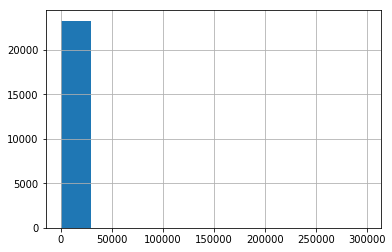

 kw_avg_min


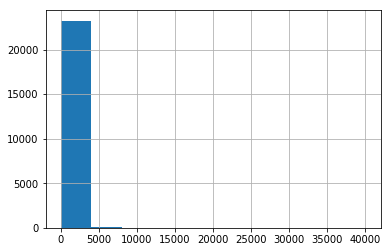

 kw_min_max


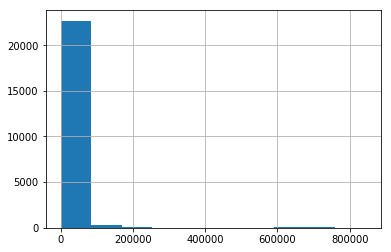

 kw_max_max


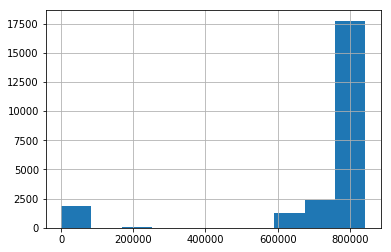

 kw_avg_max


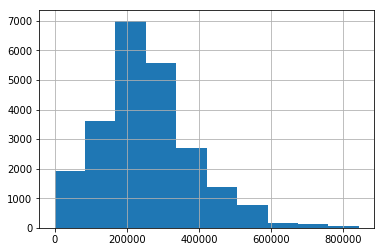

 kw_min_avg


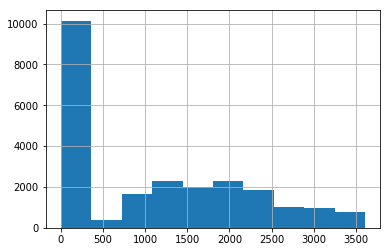

 kw_max_avg


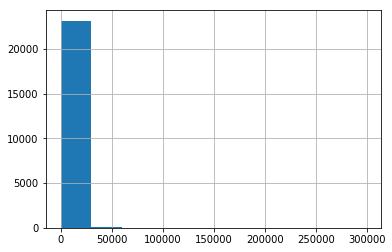

 kw_avg_avg


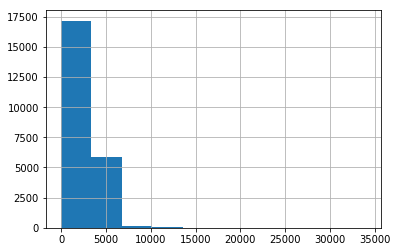

 self_reference_min_shares


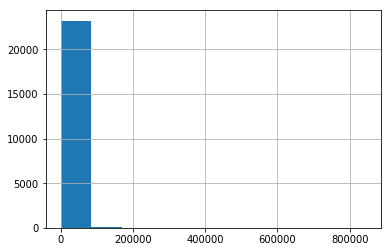

 self_reference_max_shares


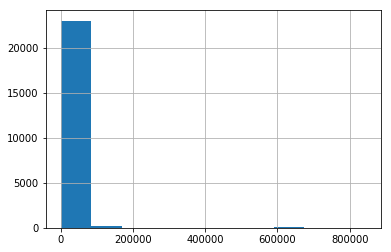

 self_reference_avg_sharess


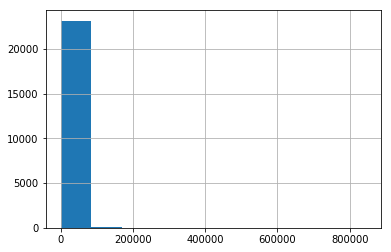

 weekday_is_monday


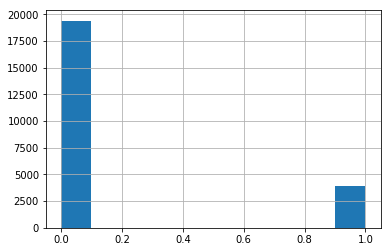

 weekday_is_tuesday


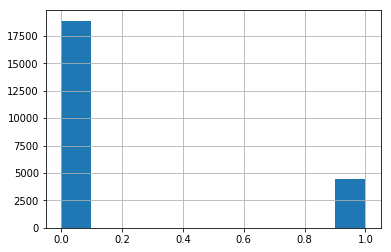

 weekday_is_wednesday


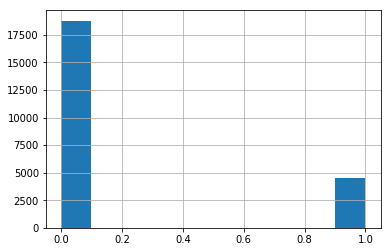

 weekday_is_thursday


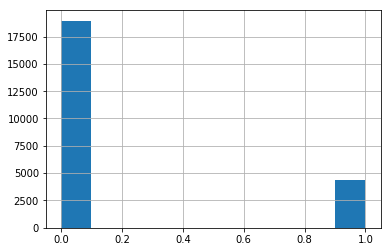

 weekday_is_friday


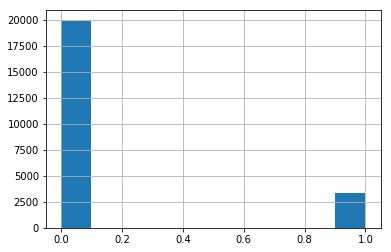

 weekday_is_saturday


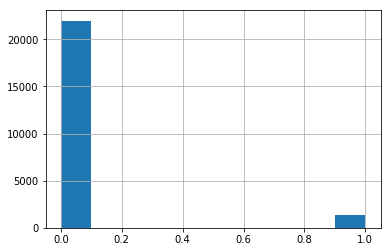

 weekday_is_sunday


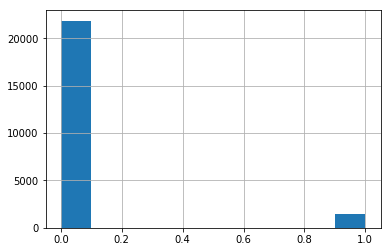

 is_weekend


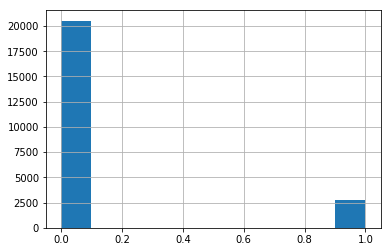

 LDA_00


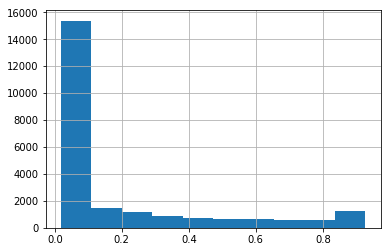

 LDA_01


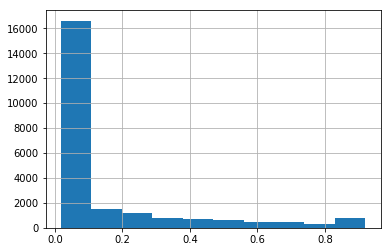

 LDA_02


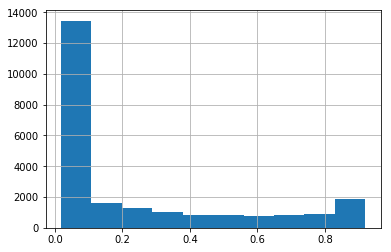

 LDA_03


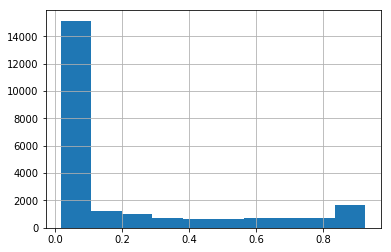

 LDA_04


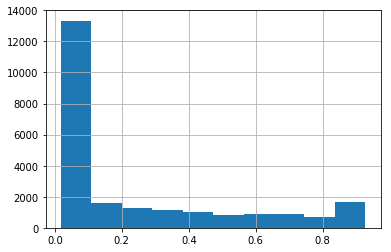

 global_subjectivity


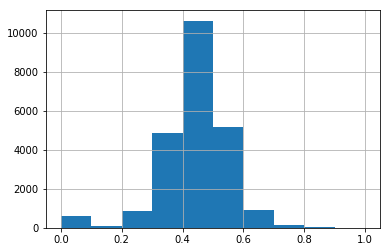

 global_sentiment_polarity


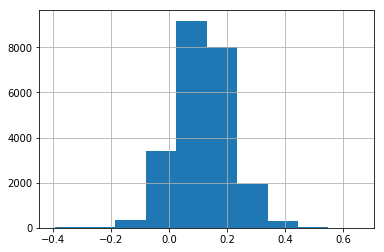

 global_rate_positive_words


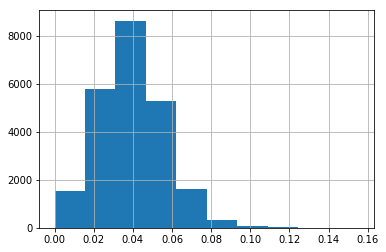

 global_rate_negative_words


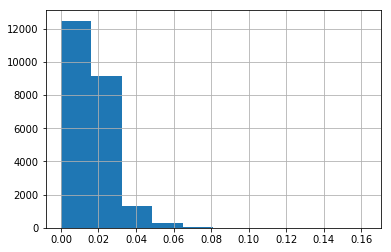

 rate_positive_words


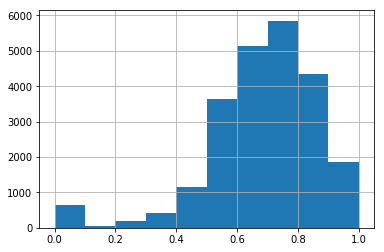

 rate_negative_words


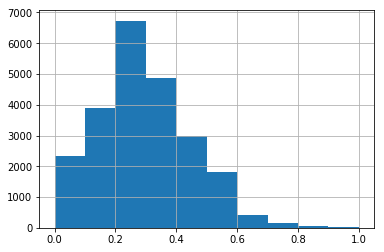

 avg_positive_polarity


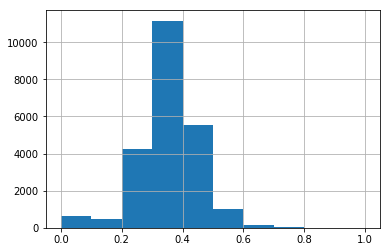

 min_positive_polarity


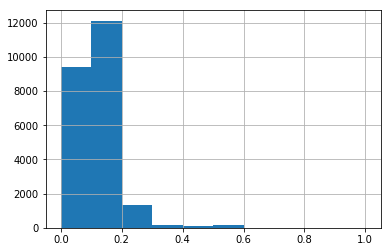

 max_positive_polarity


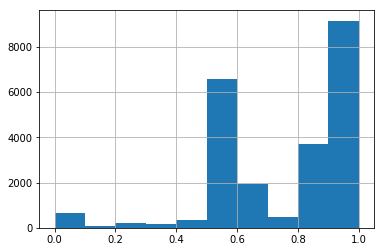

 avg_negative_polarity


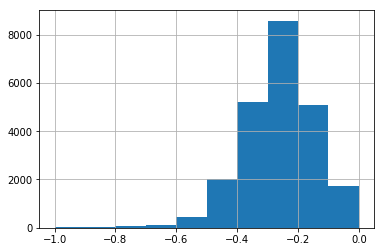

 min_negative_polarity


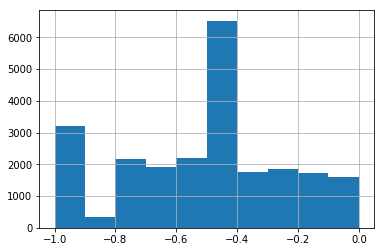

 max_negative_polarity


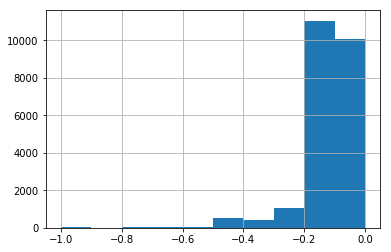

 title_subjectivity


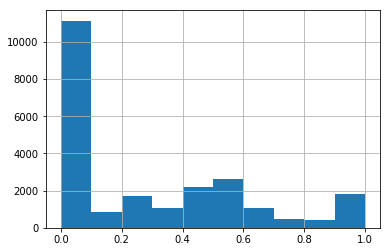

 title_sentiment_polarity


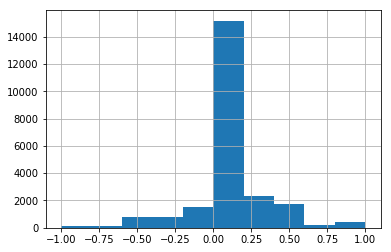

 abs_title_subjectivity


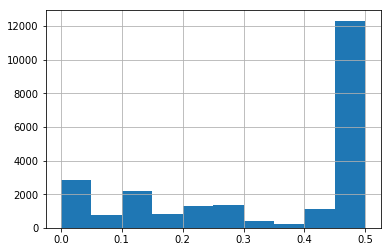

 abs_title_sentiment_polarity


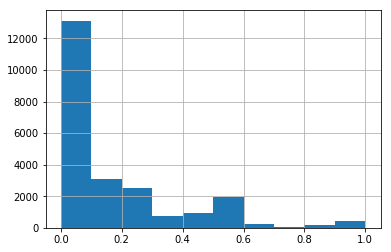

 shares


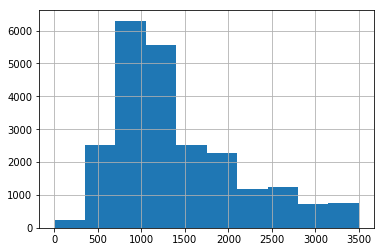

In [11]:
# plotting histograms of feartures to observe distributions to get insights on applying transformations
for i in df_train.columns:
    print(i)
    df_train.loc[:,i].hist()
    plt.show()

In [12]:
df_y_train = df_train[' shares']
df_train= df_train.drop(' shares',axis=1)

In [13]:
# limiting outliers from features 
feat_ranks = df_train.rank(method='first')

df_train_new = df_train[~feat_ranks[feat_ranks<22296].isnull()]
df_train_new = df_train_new.fillna(df_train_new.max())

df_train_new= df_train_new[~feat_ranks[feat_ranks>1000].isnull()]
df_train_new = df_train_new.fillna(df_train_new.min())

In [14]:
df_train_new.drop('url_id',axis=1, inplace=True) # each url id is unique, so this feature does not add value
df_test.drop('url_id',axis=1, inplace=True)

In [15]:
cols_transform = [' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess']

cols_transform2 = [' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' title_subjectivity',
        ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']

In [16]:
# feature transformatinos for better learning
for i in cols_transform:
    df_train_new.loc[:,i] = np.log(df_train_new.loc[:,i]+2)
    df_test.loc[:,i] = np.log(df_test.loc[:,i]+2)

for i in cols_transform2:
    df_train_new.loc[:,i] = np.log(100*(0.01+df_train_new.loc[:,i]))
    df_test.loc[:,i] = np.log(100*(0.01+df_test.loc[:,i]))

# limiting test set min max feature values
for i in df_test.columns:
    df_test.loc[df_test[i]<df_train_new[i].min(),i] = df_train_new[i].min()
   
    df_test.loc[df_test[i]>df_train_new[i].max(),i] = df_train_new[i].max()
    

In [17]:
df_train_new.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,703.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,3.931826,-0.187500,0.000000,2.983153
1,703.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,3.931826,0.000000
2,703.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,3.931826,0.000000
3,703.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,9.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,3.838474,0.136364,1.712979,2.683509
4,703.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,...,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,4.178773,0.214286,2.726919,3.110336


In [18]:
df_train.shape

(23296, 60)

In [19]:
df_train_new.describe().reset_index().T # descriptive stats of features

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
timedelta,23296,350.668,214.283,36,157,331,543,703
n_tokens_title,23296,10.4056,1.95182,7,9,10,12,14
n_tokens_content,23296,523.036,359.926,98,250,415,710,1450
n_unique_tokens,23296,0.540121,0.0979955,0.342811,0.47294,0.53913,0.606907,0.729508
n_non_stop_words,23296,1,3.96998e-09,1,1,1,1,1
n_non_stop_unique_tokens,23296,0.688562,0.0972076,0.469256,0.628931,0.692308,0.755319,0.864865
num_hrefs,23296,9.83504,7.73942,1,4,7,13,31
num_self_hrefs,23296,2.97485,2.38705,0,1,3,4,9
num_imgs,23296,3.74421,5.68508,0,1,1,3,21


 timedelta


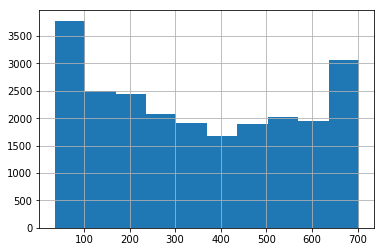

 n_tokens_title


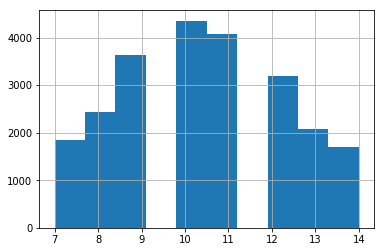

 n_tokens_content


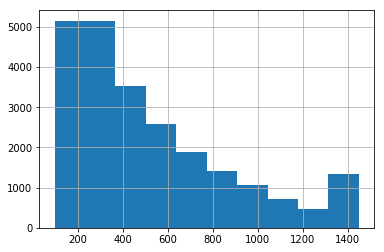

 n_unique_tokens


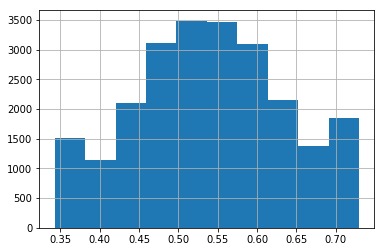

 n_non_stop_words


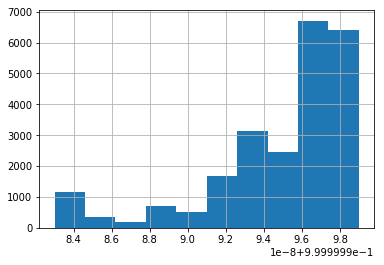

 n_non_stop_unique_tokens


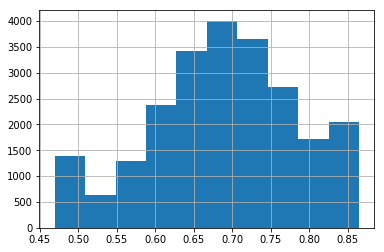

 num_hrefs


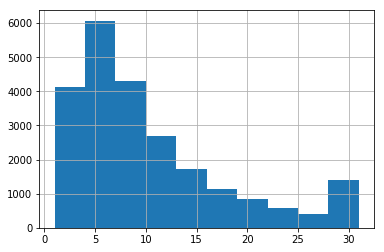

 num_self_hrefs


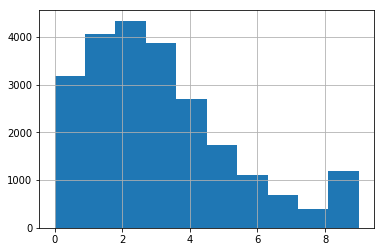

 num_imgs


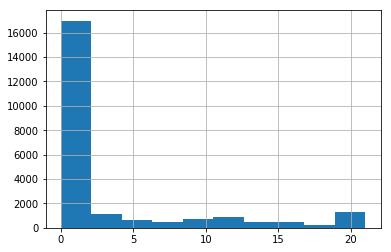

 num_videos


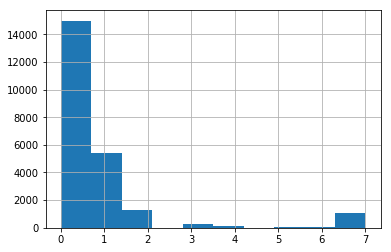

 average_token_length


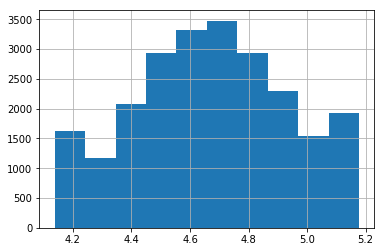

 num_keywords


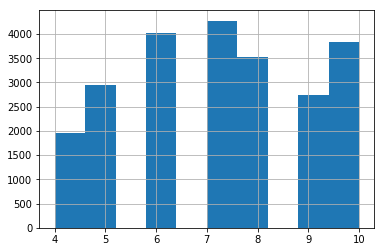

 data_channel_is_lifestyle


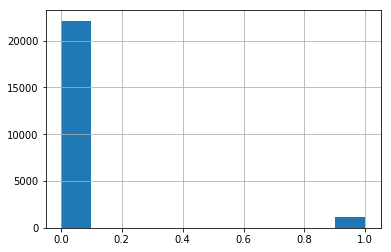

 data_channel_is_entertainment


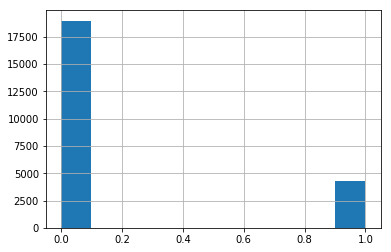

 data_channel_is_bus


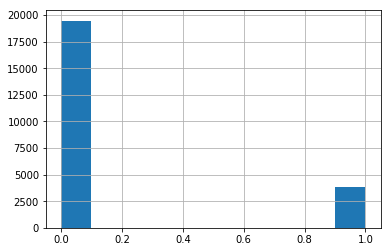

 data_channel_is_socmed


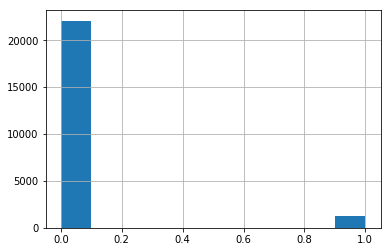

 data_channel_is_tech


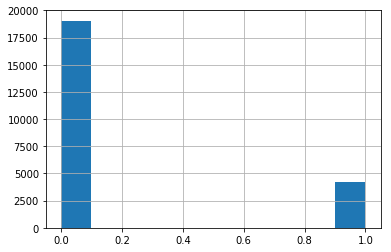

 data_channel_is_world


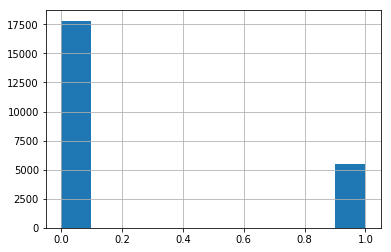

 kw_min_min


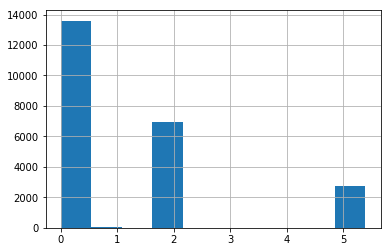

 kw_max_min


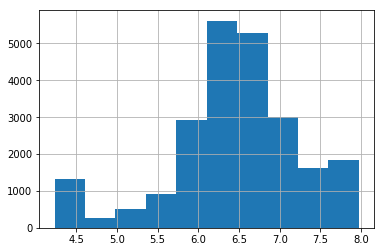

 kw_avg_min


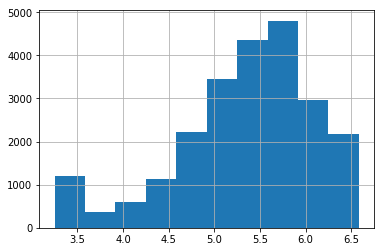

 kw_min_max


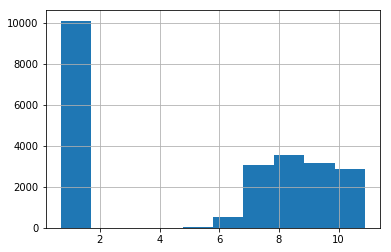

 kw_max_max


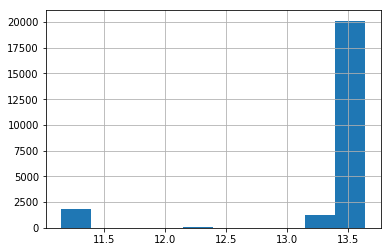

 kw_avg_max


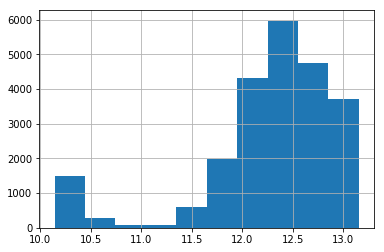

 kw_min_avg


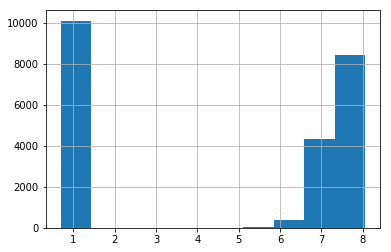

 kw_max_avg


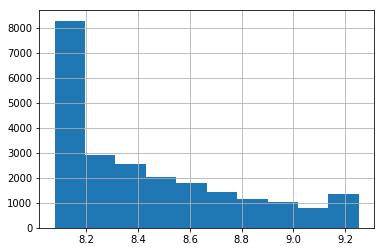

 kw_avg_avg


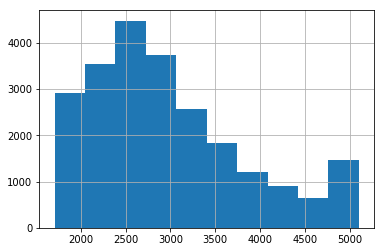

 self_reference_min_shares


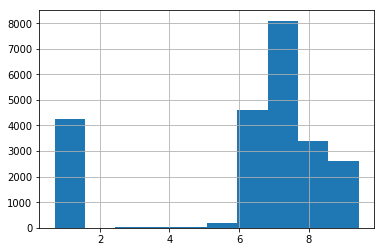

 self_reference_max_shares


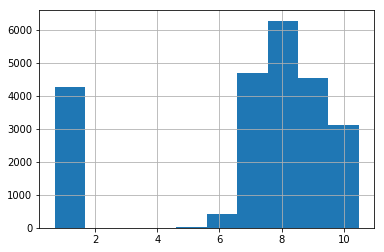

 self_reference_avg_sharess


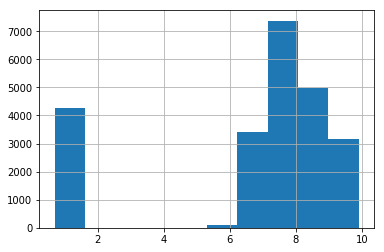

 weekday_is_monday


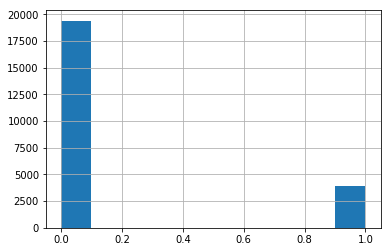

 weekday_is_tuesday


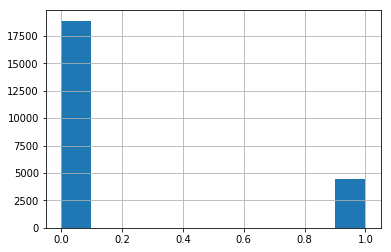

 weekday_is_wednesday


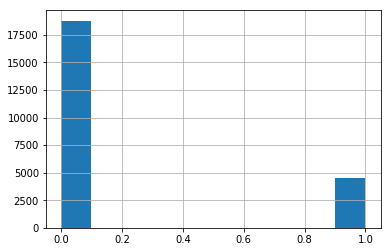

 weekday_is_thursday


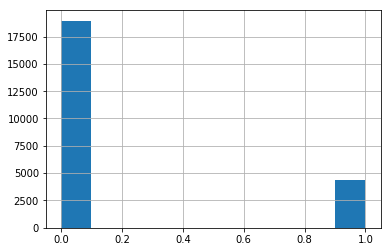

 weekday_is_friday


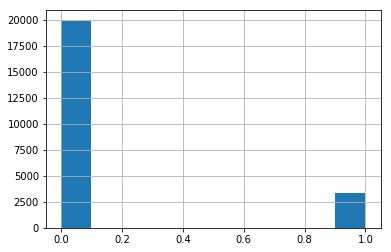

 weekday_is_saturday


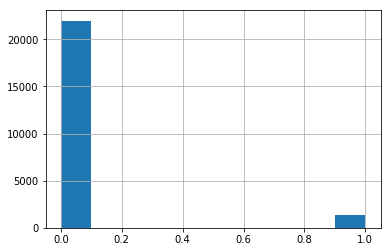

 weekday_is_sunday


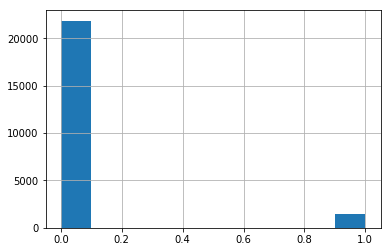

 is_weekend


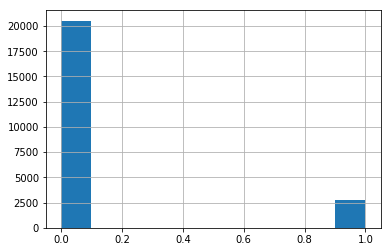

 LDA_00


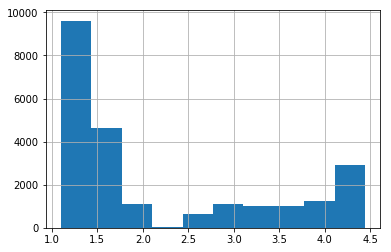

 LDA_01


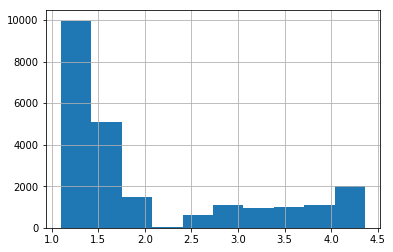

 LDA_02


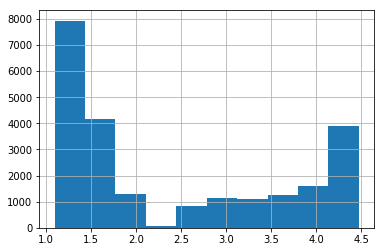

 LDA_03


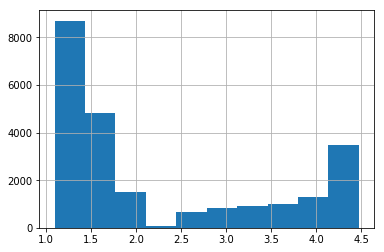

 LDA_04


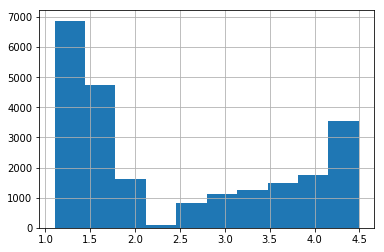

 global_subjectivity


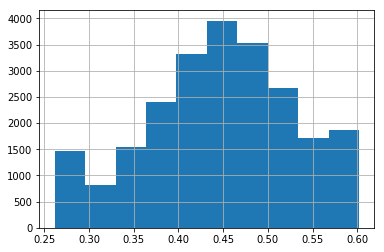

 global_sentiment_polarity


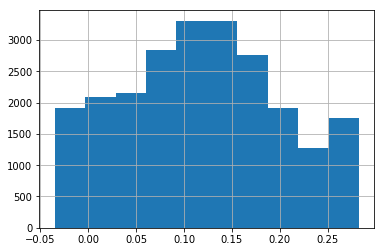

 global_rate_positive_words


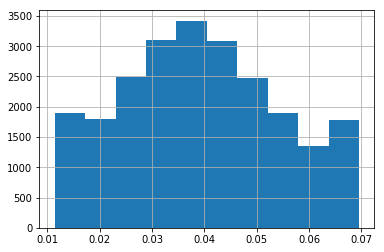

 global_rate_negative_words


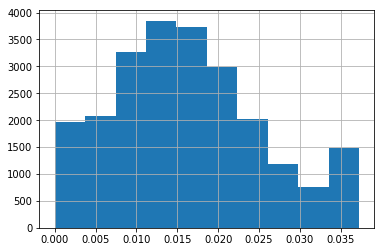

 rate_positive_words


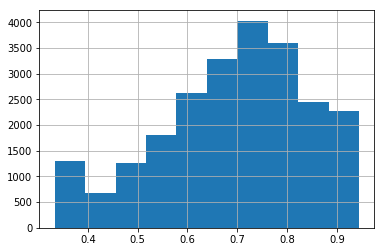

 rate_negative_words


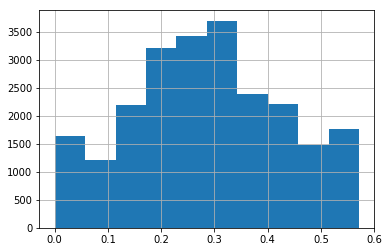

 avg_positive_polarity


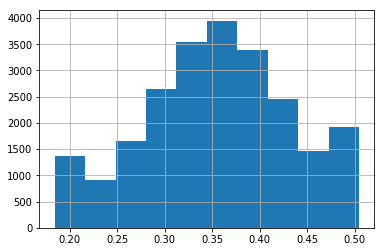

 min_positive_polarity


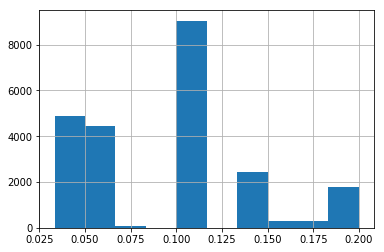

 max_positive_polarity


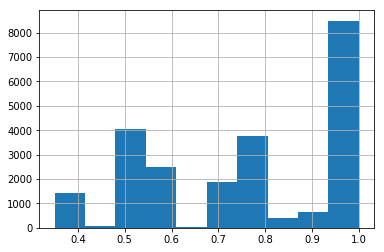

 avg_negative_polarity


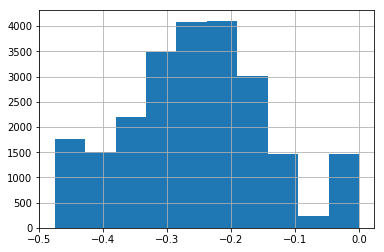

 min_negative_polarity


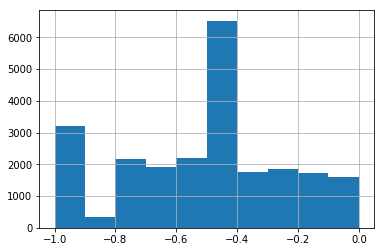

 max_negative_polarity


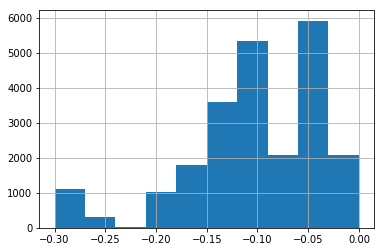

 title_subjectivity


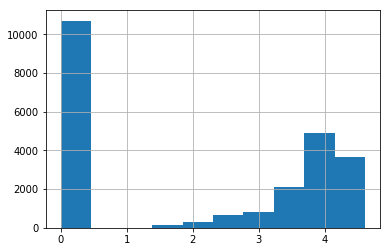

 title_sentiment_polarity


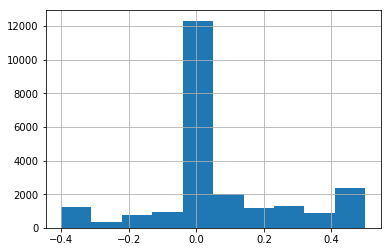

 abs_title_subjectivity


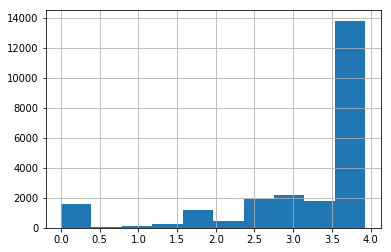

 abs_title_sentiment_polarity


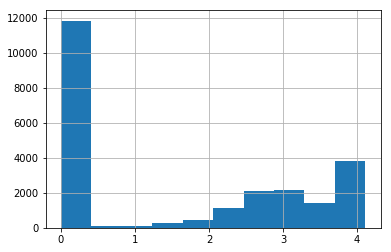

In [20]:
for i in df_train_new.columns:
    print(i)
    df_train_new.loc[:,i].hist()
    plt.show()

## KFold

In [21]:
kf =KFold(n_splits=5, random_state=1)

In [22]:
l = []
l2 = []

In [23]:
fold=0
for train_index, test_index in kf.split(df_train_new,df_y_train):
    # K fold cross validation for sampling
    fold+=1
    print('fold = ',fold)
    X_train, X_val = df_train_new.loc[train_index].dropna(), df_train_new.loc[test_index].dropna()
    y_train, y_val = df_y_train.loc[train_index].dropna(), df_y_train.loc[test_index].dropna()
   
    scale_x = StandardScaler() # feature scaling
    scale_y = StandardScaler()
    
    X_train_scaled = scale_x.fit_transform(X_train)
    y_train_scaled = scale_y.fit_transform(y_train.values.reshape(-1,1))
    X_test_scaled = scale_x.transform(df_test)

    X_val_scaled = scale_x.transform(X_val)
    y_val_scaled = scale_y.transform(y_val.values.reshape(-1,1))
    
    # SMOTE by creating a categorical variable for very low values of shares. 
    # This was dopne as model was biased towards higher values with minimum prediction of around 1100 on the test set
    # but around 30% of the training data has shares below 1000
    
    y_dum = pd.DataFrame(y_train)
    y_dum['class'] = 0
    y_dum.loc[y_dum[' shares']<=600,'class'] = 1 

    ny = X_train.shape[0]
    smt = SMOTE(random_state=1,sampling_strategy={0:17333,1:4000}) # 1500

    # append features and y_train to genereate syntheric samples
    train_SMOTE = smt.fit_resample(np.append(X_train_scaled, y_train.values.reshape(ny,-1),axis=1),y_dum['class'])[0]

    X_train_smote = train_SMOTE[:,:59]
    y_train_smote = train_SMOTE[:,59]
    
    # fitting Random Forest model
    rf = RandomForestRegressor(random_state=1, n_estimators=100,max_depth=8)
    sfm = SelectFromModel(rf) # select best features having highest feature importances
    sfm.fit(X_train_smote,y_train_smote)

    X_train_transform = sfm.transform(X_train_smote)
    X_val_transform = sfm.transform(X_val_scaled)
    X_test_transform = sfm.transform(X_test_scaled)
    rf.fit(X_train_transform, y_train_smote) 
    
    n_v=X_val_transform.shape[0]
    n_tr= X_train_transform.shape[0]
    n_te= X_test_transform.shape[0]
    
    train_pred = rf.predict(X_train_transform) 
    val_pred = rf.predict(X_val_transform)
    test_pred = rf.predict(X_test_transform)
    
    # add predicted values from initial rf model as a feature and train another rf model
    new_train = np.append(X_train_transform,np.reshape(train_pred,(n_tr,-1)),axis=1)
    new_val =  np.append(X_val_transform,np.reshape(val_pred,(n_v,-1)),axis=1)
    new_test = np.append(X_test_transform,np.reshape(test_pred,(n_te,-1)),axis=1)
    
    rf.fit(new_train,y_train_smote) # fit another rf model
 
    train_score = rf.score(new_train, y_train_smote)
    val_score = rf.score(new_val, y_val)
    
    train_pred = rf.predict(new_train)
    val_pred = rf.predict(new_val)
    
    # evaluation metrics
    error_train = np.mean(np.abs((train_pred-y_train_smote)/y_train_smote))*100
    error_val = np.mean(np.abs((val_pred-y_val)/y_val))*100
    
    l.append({'train_score':train_score,'val_score':val_score,'error_train':error_train,'error_val':error_val})
    l2.append(rf.predict(new_test))
    


fold =  1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (17333) in class 0 will be larger than the number of samples in the majority class (class #0 -> 13864)
  n_samples_majority))


fold =  2


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (17333) in class 0 will be larger than the number of samples in the majority class (class #0 -> 14128)
  n_samples_majority))


fold =  3


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (17333) in class 0 will be larger than the number of samples in the majority class (class #0 -> 13961)
  n_samples_majority))


fold =  4


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (17333) in class 0 will be larger than the number of samples in the majority class (class #0 -> 13798)
  n_samples_majority))


fold =  5


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (17333) in class 0 will be larger than the number of samples in the majority class (class #0 -> 13713)
  n_samples_majority))


In [24]:
pd.DataFrame(l) # new best 78.2

,error_train,error_val,train_score,val_score
0,57.533623,56.804605,0.446911,-0.196305
1,50.968859,83.628061,0.445460,0.062865
2,47.164894,88.434516,0.448595,0.020637
3,65.618036,39.067264,0.453120,0.085194
4,55.494569,57.622639,0.448046,0.005963


In [25]:
final_pred_rf_new= (l2[0] +l2[1] +l2[2] +l2[3] +l2[4])/5 # averaging over all 5 rf models trained for separate validation

(array([  13.,   73.,  157.,  271.,  426.,  946., 1287.,  541.,  116.,
          18.]),
 array([-2540.43457207, -2070.81640536, -1601.19823865, -1131.58007194,
         -661.96190523,  -192.34373852,   277.27442819,   746.8925949 ,
         1216.51076161,  1686.12892832,  2155.74709503]),
 <a list of 10 Patch objects>)

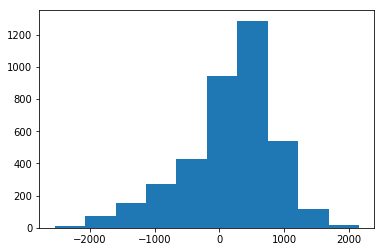

In [26]:
plt.hist(val_pred-y_val) # residuals on last validations set , normally distributed

In [27]:
df_y_train.loc[(df_y_train>=700)&(df_y_train<=1500)].shape

(12836,)

In [28]:
final_pred_rf_new[(final_pred_rf_new>=700)&(final_pred_rf_new<=1500)].shape

(6183,)

(array([9.800e+01, 6.690e+02, 1.978e+03, 2.310e+03, 2.354e+03, 1.535e+03,
        9.540e+02, 4.780e+02, 2.370e+02, 1.480e+02, 7.100e+01, 1.000e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 600,  800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600,
        2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200]),
 <a list of 18 Patch objects>)

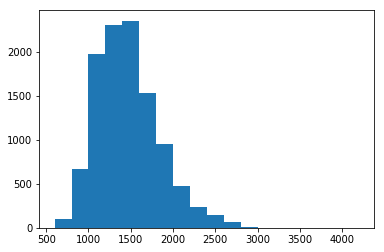

In [29]:
plt.hist(final_pred_rf_new,bins=[i for i in range(600,4400,200)]) # distribution of predicted values on test set

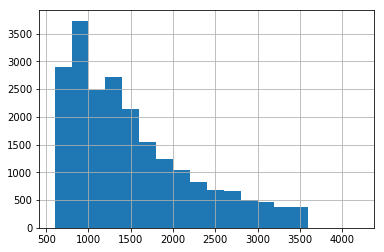

In [30]:
df_y_train.hist(bins=[i for i in range(600,4400,200)]) #distribution of y of training set

In [31]:
# roundingto nearest 100 as most of the data in training set is like thar
final_pred_rf_new=(final_pred_rf_new/100).astype(int)*100 